C:\Users\nupur\AppData\Local\Temp\ipykernel_20600\3803137025.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=interval, progress=False)



📊 Basic Statistics:
              Open         High          Low        Close        Volume
count  1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03
mean    138.247375   139.863375   136.743543   138.377811  9.895373e+07
std      33.453057    33.579799    33.319774    33.459340  5.439610e+07
min      55.277740    55.379531    51.528412    54.378578  2.404830e+07
25%     120.869271   122.008187   119.225826   120.763399  6.407675e+07
50%     143.100283   144.829627   141.584398   143.250969  8.467540e+07
75%     163.960279   165.974612   162.434227   163.691669  1.155069e+08
max     196.580427   198.168786   195.567849   196.669769  4.265100e+08

ℹ️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1006 non-null   float64
 1   High    1006 non-null   float64
 2   Low     1006 non-null   float64
 3

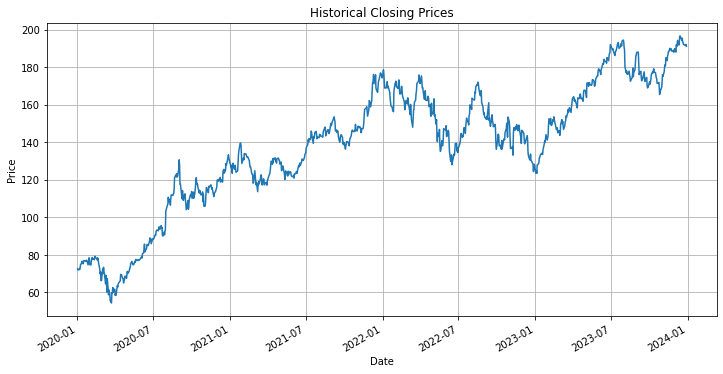

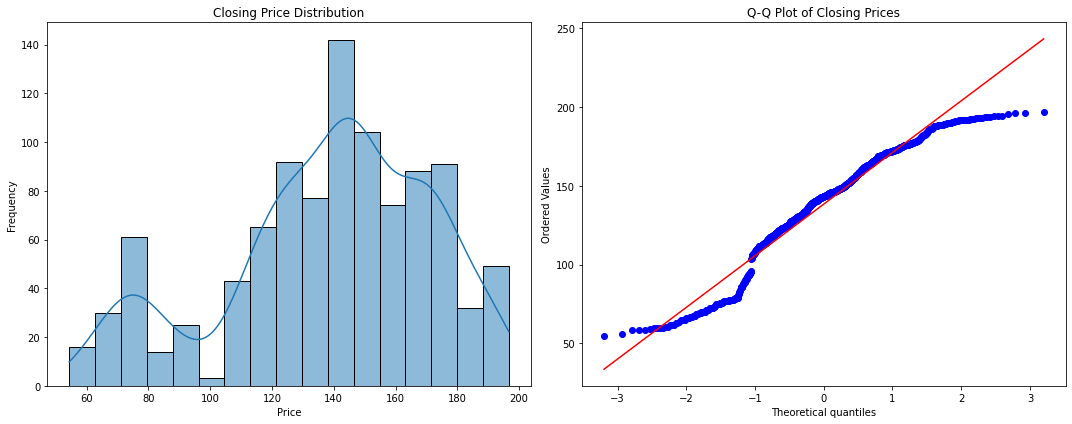

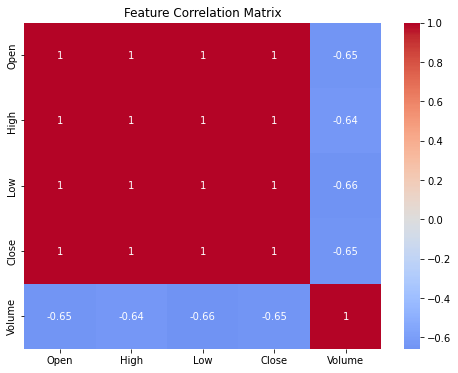

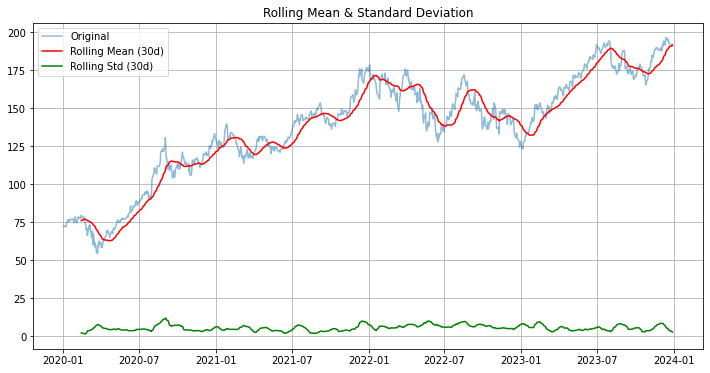

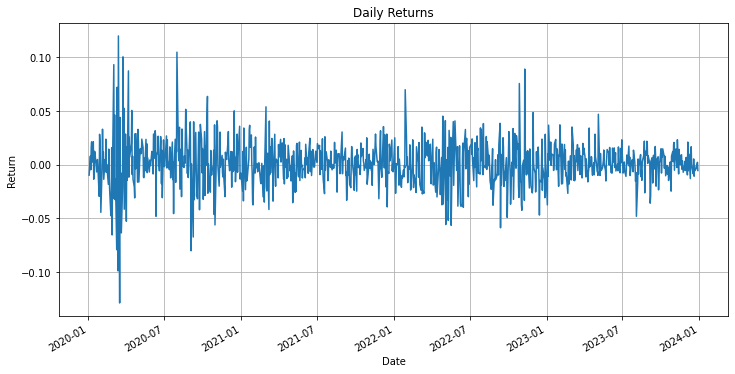


📉 ADF Test Results:
{'ADF Statistic': -1.511950605712975, 'p-value': 0.527591479618528, 'Critical Values': {'1%': -3.4368734638130847, '5%': -2.8644201518188126, '10%': -2.5683035273879358}}


C:\Users\nupur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


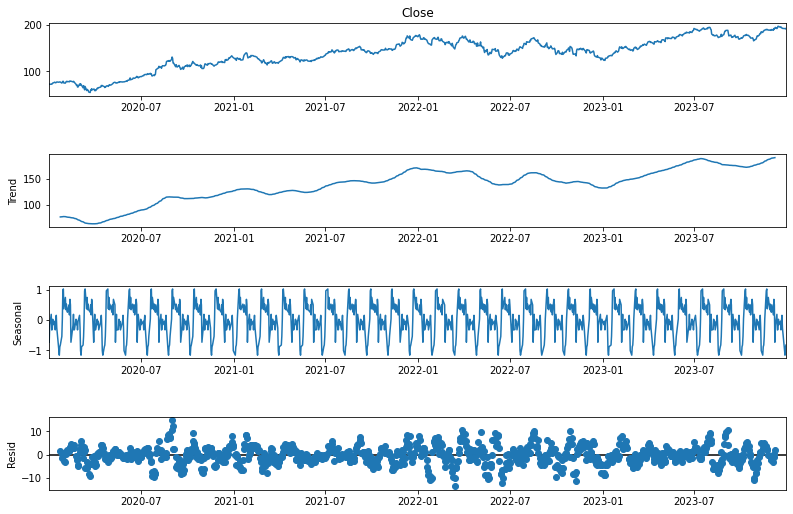

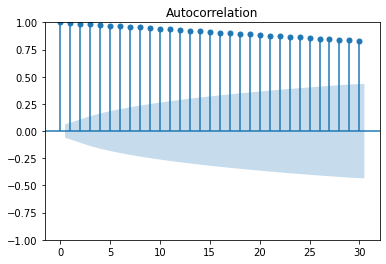

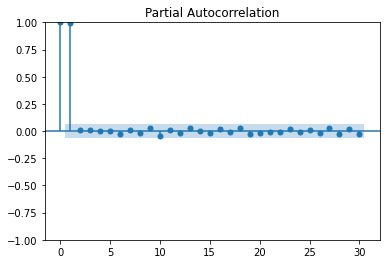

C:\Users\nupur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nupur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nupur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nupur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is ava

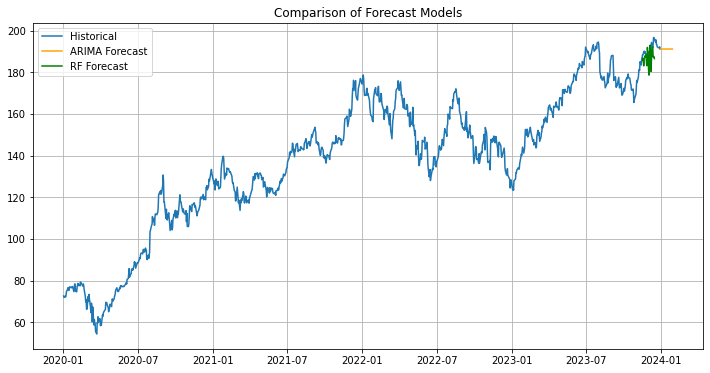

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def display_basic_stats(df):
    """Display basic statistics and information about the DataFrame"""
    print("\n📊 Basic Statistics:")
    print(df.describe())
    
    print("\nℹ️ DataFrame Info:")
    print(df.info())
    
    print("\n🔍 Missing Values:")
    print(df.isnull().sum())

def plot_price_distribution(df):
    """Plot distribution of closing prices with Q-Q plot"""
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df['Close'], kde=True)
    plt.title('Closing Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df['Close'], plot=plt)
    plt.title('Q-Q Plot of Closing Prices')
    
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    """Plot correlation heatmap for numerical columns"""
    plt.figure(figsize=(8, 6))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.show()

def analyze_rolling_stats(df, window=30):
    """Calculate and visualize rolling statistics"""
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Original', alpha=0.5)
    plt.plot(rolling_mean, label=f'Rolling Mean ({window}d)', color='red')
    plt.plot(rolling_std, label=f'Rolling Std ({window}d)', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return rolling_mean, rolling_std

def perform_eda(df):
    """Comprehensive EDA for stock data"""

    display_basic_stats(df)
    
    plt.figure(figsize=(12, 6))
    df['Close'].plot()
    plt.title('Historical Closing Prices')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
    plot_price_distribution(df)
    
    plot_correlation_heatmap(df)
    
    rolling_mean, rolling_std = analyze_rolling_stats(df)
  
    df['Daily_Return'] = df['Close'].pct_change()
    
    plt.figure(figsize=(12, 6))
    df['Daily_Return'].plot()
    plt.title('Daily Returns')
    plt.ylabel('Return')
    plt.grid(True)
    plt.show()
    
    return df, rolling_mean, rolling_std


if __name__ == "__main__":
    # Fetch and load data
    ticker = "AAPL"
    start_date = "2020-01-01"
    end_date = "2023-12-31"
    
    fetch_stock_data(ticker, start_date, end_date, interval="1d")
    df = load_data_from_csv()
    
    # Comprehensive EDA
    enhanced_df, rolling_mean, rolling_std = perform_eda(df)
    
    decomposition = decompose_series(enhanced_df)
    plot_decomposition(decomposition)
    
    adf_result = check_stationarity(enhanced_df['Close'])
    print("\n📉 ADF Test Results:")
    print(adf_result)
    
    acf_fig, pacf_fig = plot_acf_pacf(enhanced_df['Close'])
    plt.show()
    
    # Forecasting 
    arima_forecast_result = arima_forecast(enhanced_df)
    random_forest_forecast_result = random_forest_forecast(enhanced_df)
    
    plt.figure(figsize=(12, 6))
    plt.plot(enhanced_df['Close'], label='Historical')
    plt.plot(arima_forecast_result, label='ARIMA Forecast', color='orange')
    plt.plot(random_forest_forecast_result, label='RF Forecast', color='green')
    plt.title('Comparison of Forecast Models')
    plt.legend()
    plt.grid(True)
    plt.show()
